In [20]:
import pandas as pd
train = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/train.csv')
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/test.csv')

In [21]:
print("train features: ", train.shape[1])
print("test features: ", test.shape[1])

train features:  12
test features:  11


In [22]:
print("target col: ", train.columns.difference(test.columns)[0])


target col:  Survived


In [23]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train, random_state=2)
print("train shape: ", train.shape)
print("val shape: ", val.shape)

train shape:  (668, 12)
val shape:  (223, 12)


In [24]:
target = 'Survived'

In [25]:
y_train = train[target]
y_train.value_counts(normalize=True)

0    0.625749
1    0.374251
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

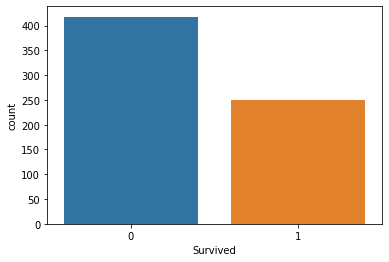

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train)

In [87]:
# mode(): Return the highest frequency value in a Series.
major = y_train.mode()[0]

y_pred = [major] * len(y_train)

0

In [28]:
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.625748502994012


In [29]:
y_val = val[target]
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

validation accuracy:  0.5874439461883408


In [30]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,668.000000,668.000000,668.000000,527.000000,668.000000,668.000000,668.000000
mean,443.224551,0.374251,2.303892,29.576376,0.501497,0.405689,32.583071
std,256.363463,0.484292,0.835234,14.118577,1.080701,0.835008,49.782390
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,225.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,663.500000,1.000000,3.000000,38.000000,1.000000,0.250000,31.068750
max,891.000000,1.000000,3.000000,71.000000,8.000000,6.000000,512.329200


In [31]:
train['Age']

199    24.0
129    45.0
90     29.0
230    35.0
126     NaN
       ... 
534    30.0
584     NaN
493    71.0
527     NaN
168     NaN
Name: Age, Length: 668, dtype: float64

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 199 to 168
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Survived     668 non-null    int64  
 2   Pclass       668 non-null    int64  
 3   Name         668 non-null    object 
 4   Sex          668 non-null    object 
 5   Age          527 non-null    float64
 6   SibSp        668 non-null    int64  
 7   Parch        668 non-null    int64  
 8   Ticket       668 non-null    object 
 9   Fare         668 non-null    float64
 10  Cabin        149 non-null    object 
 11  Embarked     666 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 67.8+ KB


In [33]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

features = ['Pclass','Age','Fare']
X_train = train[features]
X_val = val[features]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

linear_model.fit(X_train_imputed, y_train)

pred = linear_model.predict(X_val_imputed)

In [36]:
pd.Series(linear_model.coef_, features)

Pclass   -0.203810
Age      -0.007513
Fare      0.000819
dtype: float64

In [37]:
test_case = [[1, 5, 600]]
linear_model.predict(test_case)

array([1.28916042])

In [38]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train_imputed, y_train)


LogisticRegression()

In [39]:
print('검증세트 정확도', logistic.score(X_val_imputed, y_val))

검증세트 정확도 0.7130044843049327


In [40]:
pred = logistic.predict(X_val_imputed)
pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [41]:
logistic.predict(test_case)

array([1], dtype=int64)

In [42]:
logistic.predict_proba(test_case)

array([[0.01749669, 0.98250331]])

In [44]:
print(features)
print(logistic.coef_)

['Pclass', 'Age', 'Fare']
[[-0.90248227 -0.03581619  0.00447486]]


In [45]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [46]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.000,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.975,NaN,S


In [47]:
train['Ticket'].value_counts()

347088          6
3101295         5
CA. 2343        5
S.O.C. 14879    5
382652          5
               ..
349203          1
113501          1
323592          1
2674            1
PC 17318        1
Name: Ticket, Length: 539, dtype: int64

In [48]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
90,91,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
126,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
163,164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1000,E8,S
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q


In [50]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

In [51]:
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
199,2,female,24.0,0,0,13.000,S
129,3,male,45.0,0,0,6.975,S
90,3,male,29.0,0,0,8.050,S


In [53]:
encoder = OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_train_encoded.head(3)

,Pclass,Sex_female,Sex_male,Age,SibSp,Parch,Fare,Embarked_S,Embarked_Q,Embarked_C,Embarked_nan
199,2,1,0,24.0,0,0,13.000,1,0,0,0
129,3,0,1,45.0,0,0,6.975,1,0,0,0
90,3,0,1,29.0,0,0,8.050,1,0,0,0


In [54]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

In [57]:
X_val_imputed[:5]

array([[ 1.    ,  0.    ,  1.    , 42.    ,  0.    ,  0.    , 26.2875,
         1.    ,  0.    ,  0.    ,  0.    ],
       [ 3.    ,  0.    ,  1.    , 21.    ,  0.    ,  0.    ,  8.05  ,
         1.    ,  0.    ,  0.    ,  0.    ],
       [ 2.    ,  1.    ,  0.    , 24.    ,  1.    ,  2.    , 65.    ,
         1.    ,  0.    ,  0.    ,  0.    ],
       [ 3.    ,  0.    ,  1.    , 28.    ,  0.    ,  0.    , 56.4958,
         1.    ,  0.    ,  0.    ,  0.    ],
       [ 3.    ,  1.    ,  0.    , 17.    ,  4.    ,  2.    ,  7.925 ,
         1.    ,  0.    ,  0.    ,  0.    ]])

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

In [59]:
X_train_scaled

array([[-0.36411341,  1.33976829, -1.33976829, ..., -0.32832052,
        -0.50327259, -0.05479966],
       [ 0.83405288, -0.74639772,  0.74639772, ..., -0.32832052,
        -0.50327259, -0.05479966],
       [ 0.83405288, -0.74639772,  0.74639772, ..., -0.32832052,
        -0.50327259, -0.05479966],
       ...,
       [-1.56227969, -0.74639772,  0.74639772, ..., -0.32832052,
         1.98699475, -0.05479966],
       [-1.56227969, -0.74639772,  0.74639772, ..., -0.32832052,
        -0.50327259, -0.05479966],
       [-1.56227969, -0.74639772,  0.74639772, ..., -0.32832052,
        -0.50327259, -0.05479966]])

In [62]:
X_train_scaled.T[0].mean(), X_train_scaled.T[0].std()

(1.1168710666887802e-16, 1.0000000000000002)

In [63]:
model = LogisticRegression(random_state=1)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=1)

In [64]:
y_pred = model.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

0.7892376681614349

In [79]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients

Pclass         -0.915833
Sex_female      0.662095
Sex_male       -0.662095
Age            -0.559957
SibSp          -0.406466
Parch          -0.015897
Fare            0.078016
Embarked_S     -0.094939
Embarked_Q      0.007684
Embarked_C      0.077224
Embarked_nan    0.188837
dtype: float64

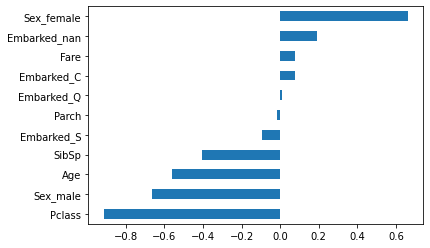

In [80]:
coefficients.sort_values().plot.barh();

In [81]:
model.intercept_

array([-0.71320882])

In [82]:
X_test = test[features]
X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)

y_pred_test = model.predict(X_test_scaled)

In [83]:
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [84]:
submission = test[['PassengerId']].copy()
submission ['Survived'] = y_pred_test

In [85]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
